<a href="https://colab.research.google.com/github/TheEvergreenStateCollege/week-3-chinchillabob/blob/main/Gausman_Kevin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [66]:
#Ignore deprication
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [67]:
df = pd.read_csv('./Data/Gausman_Kevin.csv')  
df = df.dropna(subset=['pitch_type', 'release_pos_x', 'release_pos_z'])

Text(0.5, 1.0, 'Kevin Gausman Count Pitch Type')

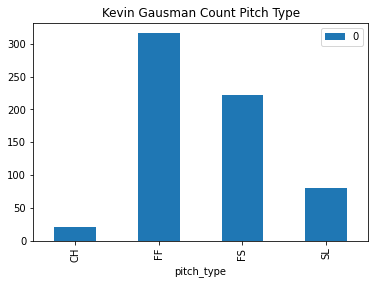

In [68]:
pitch_buckets = df.groupby(["pitch_type"]).size().reset_index().set_index("pitch_type")
ax = pitch_buckets.plot(kind='bar')
ax.set_title("Kevin Gausman Count Pitch Type")

Can we tell what pitch he throws based off release position?

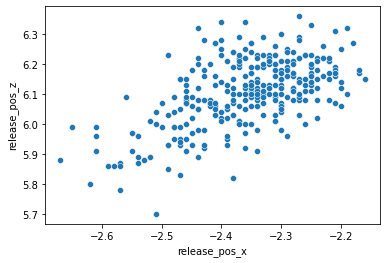

In [69]:
FF = df[df['pitch_type'] == 'FF']
sns.scatterplot(x='release_pos_x', y ='release_pos_z', data=FF)

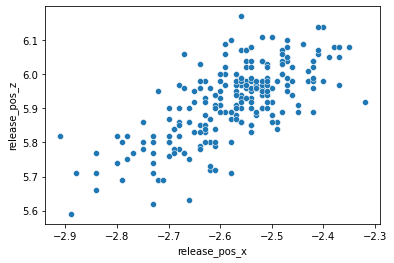

In [70]:
FS = df[df['pitch_type'] == 'FS']
sns.scatterplot(x='release_pos_x', y ='release_pos_z', data=FS)

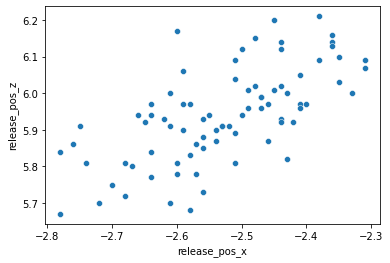

In [71]:
SL = df[df['pitch_type'] == 'SL']
sns.scatterplot(x='release_pos_x', y ='release_pos_z', data=SL)

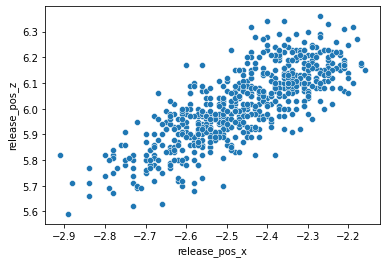

In [72]:
sns.scatterplot(x='release_pos_x', y ='release_pos_z', data=df)

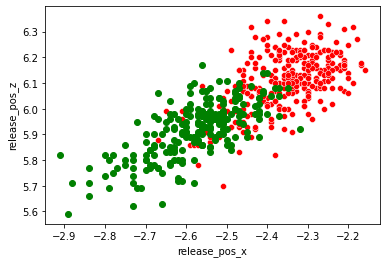

In [73]:
sns.scatterplot(x='release_pos_x', y ='release_pos_z', data=FF, color='r')
plt.scatter(FS['release_pos_x'], FS['release_pos_z'], color ='g')

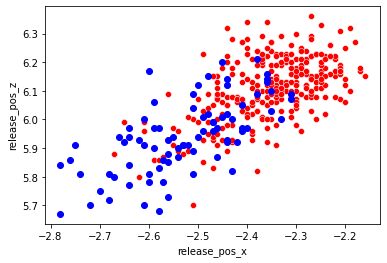

In [74]:
sns.scatterplot(x='release_pos_x', y ='release_pos_z', data=FF, color='r')
plt.scatter(SL['release_pos_x'], SL['release_pos_z'], color ='b')

In [75]:
#creating col 'isFF' where 1 is fastball, and 0 is non fastballs 
df['isFF'] = np.where(df['pitch_type'] == 'FF', 1, 0)

In [76]:
#confirming 'isFF' is inside df
df['isFF'].head

<bound method NDFrame.head of 0      0
1      1
2      1
3      1
4      0
      ..
634    1
635    1
636    0
637    1
638    1
Name: isFF, Length: 639, dtype: int64>

logistic regression cost function Cost(hθ(x), y) = -ylog(hθ(x)) - (1-y)log(1-hθ(x))

In [79]:
X = df[['release_pos_x', 'release_pos_z']]
y = df['isFF']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=0)
#model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=0, max_iter=100).fit(X_train, y_train)
model = LogisticRegression(solver='lbfgs', random_state=0, max_iter=100).fit(X_train, y_train)
y_predicted = model.predict(X_test)
y_predicted

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0])

In [80]:
y_predicted_prob = model.predict_proba(X_test)
y_predicted_prob = np.delete(y_predicted_prob,1,1)
averageConfidence = np.mean(np.abs(y_predicted_prob - 0.5) + 0.5)
#averageconfidence in guessing if a pitch based on x y release pos is a FF
averageConfidence

0.7456898374503658

In [81]:
y_test = y_test.to_numpy()
y_test

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [82]:
y_predicted

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0])

In [83]:
def intersection(a, b):
  if (a.size != b.size):
    print("shapes do not match in intersection(a, b)")
  else:
    arr = []
    for i in range(0, a.size):
      if (a[i] == b[i]):
        arr = np.concatenate([arr, np.arange(1, 2)])
      else:
        arr = np.concatenate([arr, np.arange(0, 1)])
    return arr

In [84]:
#returns an array where 1's correspond to matching prediction and test and 0's correspond to un matching prediction and test
intersect = intersection(y_predicted, y_test)
intersect

array([1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 1.])

In [85]:
def accuracy(a):
  ones = 0
  for i in np.arange(0, len(a)):
    if a[i] == 1:
      ones = ones + 1
  return ones/len(a)

In [86]:
#running this gives the percantage of time our model predicted our training data.
accuracy(intersect)

0.859375

How can I present this data in a digestable way

Would the cost function of logistic regression with one addition fold be the integral of the cost function Cost(hθ(x), y)

for multinomial regression what do we set y to in the fit()?